##ASSIGNMENT
#Dataset
Assume you are a scientist who is trying to make a propellent and is trying many tests to make an efficient propellent .
<br>
You have performed two tests.
<br>
From the two tests you would like whether this propellent works efficiently or not.
Build your own logistic regression model to decide .
<br>
Text with "DO NOT EDIT THIS CODE" needs to be only run do not edit it


In [272]:
#import libraries
#write your code.
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import plotly.express as px
import math




In [275]:
data = np.loadtxt('data.txt', delimiter=',')
X_train = data[:, 0:2]
y_train = data[:, 2]

In [276]:
#plot data to visualise
def plot_data(X,y,pos_label="y=1", neg_label="y=0"):
  pos = y == 1
  neg = y == 0
  #positive_label and negative_label refers to classes of y as y can be 0 or 1
  #While plotting graph the label parameter will be either positive_label or negative_label so plot both the labels for X
  #write your code

  plt.scatter(X[pos, 0], X[pos, 1], c='b', marker='o', label=pos_label)

  # Plot negative examples
  plt.scatter(X[neg, 0], X[neg, 1], c='r', marker='x', label=neg_label)

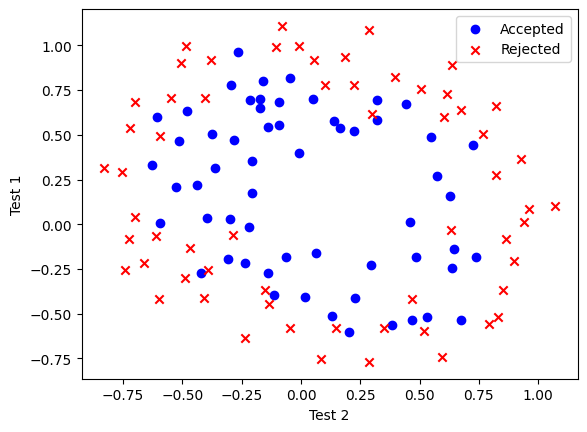

In [277]:
#test
plot_data(X_train, y_train[:], pos_label="Accepted", neg_label="Rejected")


plt.xlabel('Test 2')
plt.ylabel('Test 1')
plt.legend(loc="upper right")
plt.show()


In [279]:
#feature mapping
def map_feature(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree + 1):
        for j in range(i + 1):
            out.append((X1 ** (i - j)) * (X2 ** j))
    return np.stack(out, axis=1)
#write your code




In [280]:
print("Original shape of data:", X_train.shape)

mapped_X =  map_feature(X_train[:, 0], X_train[:, 1])
print("Shape after feature mapping:", mapped_X.shape)

Original shape of data: (118, 2)
Shape after feature mapping: (118, 27)


In [234]:
# @title DO NOT EDIT THIS CODE
def sigmoid_test(target):
    assert np.isclose(target(3.0), 0.9525741268224334), "Failed for scalar input"
    assert np.allclose(target(np.array([2.5, 0])), [0.92414182, 0.5]), "Failed for 1D array"
    assert np.allclose(target(np.array([[2.5, -2.5], [0, 1]])),
                       [[0.92414182, 0.07585818], [0.5, 0.73105858]]), "Failed for 2D array"
    print('\033[92mTests passed!')

In [295]:
#sigmoid function
def sigmoid(z):
#write your code
  return 1.0 / (1 + np.exp(-z))




In [296]:
sigmoid_test(sigmoid)


Tests passed!


In [297]:
# @title DO NOT EDIT THIS CODE
def compute_cost_test(target):
    X = np.array([[0, 0, 0, 0]]).T
    y = np.array([0, 0, 0, 0])
    w = np.array([0])
    b = 1
    result = target(X, y, w, b)
    if math.isinf(result):
        raise ValueError("Did you get the sigmoid of z_wb?")

    np.random.seed(17)
    X = np.random.randn(5, 2)
    y = np.array([1, 0, 0, 1, 1])
    w = np.random.randn(2)
    b = 0
    result = target(X, y, w, b)
    assert np.isclose(result, 2.15510667), f"Wrong output. Expected: {2.15510667} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 1, 0, 0])
    w = np.random.randn(3)
    b = 0

    result = target(X, y, w, b)
    assert np.isclose(result, 0.80709376), f"Wrong output. Expected: {0.80709376} got: {result}"

    X = np.random.randn(4, 3)
    y = np.array([1, 0,1, 0])
    w = np.random.randn(3)
    b = 3
    result = target(X, y, w, b)
    assert np.isclose(result, 0.4529660647), f"Wrong output. Expected: {0.4529660647} got: {result}. Did you inizialized z_wb = b?"

    print('\033[92mTests passed!')

In [305]:
#computing cost
def compute_cost(X,y,w,b,lambda_=1):
#write your code
    z = np.dot(X, w) + b
    predict = sigmoid(z)
    m = len(y)
    class1_cost = -y * np.log(predict)
    class2_cost = (1-y)*np.log(1-predict)
    cost = np.sum(class1_cost-class2_cost)
    total_cost = cost/m
    return total_cost

In [306]:
test_w = np.array([0.2, 0.2])
test_b = -24.
cost = compute_cost(X_train, y_train, test_w, test_b)

print('Cost at test w,b: {:.3f}'.format(cost))


# test
compute_cost_test(compute_cost)

Cost at test w,b: 11.777
Tests passed!


In [307]:
#compute regularised cost
def compute_cost_reg(X, y, w, b, lambda_ = 1):
   m = y.size
   print(m)
   cost = compute_cost(X,y,w,b,lambda_)

#write your code
   total_cost = cost + (lambda_ / (2 * m)) * np.sum(w ** 2) # This line was indented too far left.

   return total_cost

In [308]:
# @title DO NOT EDIT THIS CODE
def compute_cost_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(3)
    b = 0.4
    X = np.random.randn(6, 3)
    y = np.array([0, 1, 1, 0, 1, 1])
    lambda_ = 0.1
    expected_output = target(X, y, w, b, lambda_)

    assert np.isclose(expected_output, 0.5469746792761936), f"Wrong output. Expected: {0.5469746792761936} got:{expected_output}"

    w = np.random.randn(5)
    b = -0.6
    X = np.random.randn(8, 5)
    y = np.array([1, 0, 1, 0, 0, 1, 0, 1])
    lambda_ = 0.01
    output = target(X, y, w, b, lambda_)
    assert np.isclose(output, 1.2608591964119995), f"Wrong output. Expected: {1.2608591964119995} got:{output}"

    w = np.array([2, 2, 2, 2, 2])
    b = 0
    X = np.zeros((8, 5))
    y = np.array([0.5] * 8)
    lambda_ = 3
    output = target(X, y, w, b, lambda_)
    expected = -np.log(0.5) + 3. / (2. * 8.) * 20.
    assert np.isclose(output, expected), f"Wrong output. Expected: {expected} got:{output}"

    print('\033[92mAll tests passed!')

In [309]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5
lambda_ = 0.5
cost = compute_cost_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print("Regularised cost :", cost)

#test
compute_cost_reg_test(compute_cost_reg)

118
Regularised cost : 0.6618252552483951
6
8
8
All tests passed!


In [243]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_test(target):
    np.random.seed(1)
    X = np.random.randn(7, 3)
    y = np.array([1, 0, 1, 0, 1, 1, 0])
    test_w = np.array([1, 0.5, -0.35])
    test_b = 1.7
    dj_db, dj_dw  = target(X, y, test_w, test_b)

    assert np.isclose(dj_db, 0.28936094), f"Wrong value for dj_db. Expected: {0.28936094} got: {dj_db}"
    assert dj_dw.shape == test_w.shape, f"Wrong shape for dj_dw. Expected: {test_w.shape} got: {dj_dw.shape}"
    assert np.allclose(dj_dw, [-0.11999166, 0.41498775, -0.71968405]), f"Wrong values for dj_dw. Got: {dj_dw}"

    print('\033[92mTests passed!')

In [450]:
#compute gradient
def compute_gradient(X, y, w, b, lambda_=None):
#write your code
  m,n=X.shape
  dj_db=0
  dj_dw=np.zeros(n)
  predict= sigmoid(np.dot(X,w)+b)
  error=predict-y
  dj_db=np.sum(error)/m
  dj_dw=np.dot(X.T,error)/m


  return dj_db,dj_dw

In [451]:
test_w = np.array([ 0.2, -0.5])
test_b = -24
dj_db, dj_dw  = compute_gradient(X_train, y_train, test_w, test_b)

print('dj_db at test_w:', dj_db)
print('dj_dw at test_w:', dj_dw.tolist())

# test
compute_gradient_test(compute_gradient)

dj_db at test_w: -0.4915254236924827
dj_dw at test_w: [-0.008601361012465381, -0.09147300847306207]
Tests passed!


In [475]:
#compute regularised gradient
def compute_gradient_reg(X, y, w, b, lambda_=1):
#write your code
  m,n=X.shape
  gradient = compute_gradient(X, y, w, b, lambda_)
  dj_db = gradient[0]
  dj_dw = gradient[1]
  dj_dw += (lambda_*w/ m)

  return dj_db,dj_dw

In [476]:
# @title DO NOT EDIT THIS CODE
def compute_gradient_reg_test(target):
    np.random.seed(1)
    w = np.random.randn(5)
    b = 0.2
    X = np.random.randn(7, 5)
    y = np.array([0, 1, 1, 0, 1, 1, 0])
    lambda_ = 0.1
    expected1 = (-0.1506447567869257, np.array([ 0.19530838, -0.00632206,  0.19687367,  0.15741161,  0.02791437]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)

    assert np.isclose(dj_db, expected1[0]), f"Wrong dj_db. Expected: {expected1[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected1[1]), f"Wrong dj_dw. Expected: {expected1[1]} got: {dj_dw}"


    w = np.random.randn(7)
    b = 0
    X = np.random.randn(7, 7)
    y = np.array([1, 0, 0, 0, 1, 1, 0])
    lambda_ = 0
    expected2 = (0.02660329857573818, np.array([ 0.23567643, -0.06921029, -0.19705212, -0.0002884 ,  0.06490588,
        0.26948175,  0.10777992]))
    dj_db, dj_dw = target(X, y, w, b, lambda_)
    assert np.isclose(dj_db, expected2[0]), f"Wrong dj_db. Expected: {expected2[0]} got: {dj_db}"
    assert np.allclose(dj_dw, expected2[1]), f"Wrong dj_dw. Expected: {expected2[1]} got: {dj_dw}"

    print('\033[92mTests passed!')

In [477]:
X_mapped = map_feature(X_train[:, 0], X_train[:, 1])
np.random.seed(1)
initial_w  = np.random.rand(X_mapped.shape[1]) - 0.5
initial_b = 0.5

lambda_ = 0.5
dj_db, dj_dw= compute_gradient_reg(X_mapped, y_train, initial_w, initial_b, lambda_)

print(f"dj_db: {dj_db}" )
#test
compute_gradient_reg_test(compute_gradient_reg)

dj_db: 0.07138288792343654
Tests passed!


In [478]:
X_mapped.shape

(118, 27)

In [479]:
y_train.shape

(118,)

In [481]:
w.shape

(27,)

In [532]:
np.random.seed(1)
initial_w = np.random.rand(X_mapped.shape[1])-0.8
initial_b = 1.
lambda_ = 0.01
iterations = 1000
alpha = 0.01
def gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_):
  #write your code
    w = initial_w
    b = initial_b
    J_history = []

    for i in range(iterations):
        dj_db, dj_dw = compute_gradient_reg(X_mapped, y_train, w, b, lambda_)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        J_history.append(compute_cost_reg(X_mapped, y_train, w, b, lambda_))







        if i % 100 == 0:
             print(f"Iteration {i}: Cost {J_history[-1]}")

    return w, b, J_history


    w,b, J_history,_ = gradient_descent(X_mapped, y_train, initial_w, initial_b,
                                    compute_cost_reg, compute_gradient_reg,
                                    alpha, iterations, lambda_)


In [517]:
#plot decision boundary
def plot_decision_boundary(w,b,X,y):
  #write your code


#write your code

  plot_data(X,y)








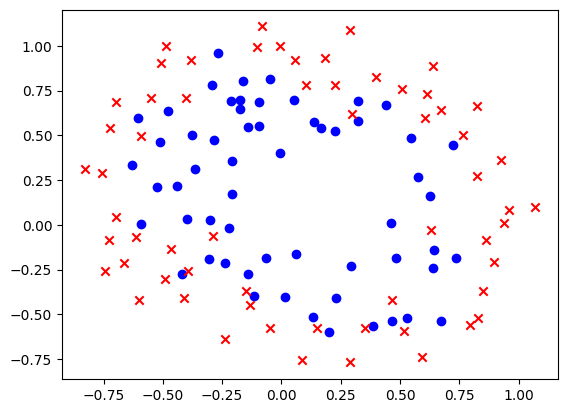

In [533]:
plot_decision_boundary(w, b, X_mapped, y_train)

In [539]:
#predict your training model
def predict(X, w, b):
  m,n=X.shape
  p=np.zeros(m)
  #write your code
  z=np.dot(X,w)+b
  p=sigmoid(z)
  print(p)
  p=np.where(p>0.5,1,0)






  return p

In [544]:
p

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1])

In [541]:
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [542]:
b

0.5176022908495344

In [543]:
p = predict(X_mapped, w, b)

print('Accuracy of training model: %f'%(np.mean(p == y_train) * 100))

[0.53776187 0.55730249 0.56039585 0.60229379 0.60131039 0.61162283
 0.6159192  0.60809456 0.59658194 0.58268391 0.55264928 0.52205308
 0.49838836 0.44770291 0.48483554 0.53230479 0.57513672 0.48304742
 0.5560728  0.57832637 0.58471847 0.60704087 0.60809967 0.59563726
 0.59641044 0.57006434 0.53857323 0.46030872 0.59770676 0.52409522
 0.36976523 0.50373379 0.57376898 0.6083411  0.61693145 0.6209846
 0.60958981 0.61664585 0.61676036 0.58647691 0.59439618 0.55851643
 0.49931522 0.5686192  0.50037909 0.51260981 0.4055592  0.56924616
 0.46198849 0.48921563 0.56995637 0.61454999 0.59485858 0.62041202
 0.62684059 0.61545318 0.62304106 0.60790935 0.33911651 0.46375553
 0.52567363 0.39147751 0.36105476 0.4251642  0.36698346 0.28688388
 0.37281032 0.28189549 0.30137958 0.36104348 0.32761383 0.35374688
 0.35709511 0.38004144 0.47375875 0.51880268 0.54844415 0.55675982
 0.54241716 0.55920864 0.57527259 0.59090707 0.58401374 0.5982271
 0.60848245 0.613159   0.61608006 0.57048459 0.55827865 0.426578